In [1]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Solar Flare Classifier

The goal of this analysis is to write a Support Vector Machine which will classify solar flare type. Our output class will roughly be the "flare_class" column of the DataFrame below. For simplicity, I have boiled the flare class to simply be a letter. "B" for all B class flares, "C", for all C class flares, "A" for all A class flares, "M" for all M class flares, and "X" for all X class flares. In the file `xray_data_wrangling.ipynb`, we have code which one-hot-encodes "flare_class" column. These are the columns "B", "C", "M", "X", and "A". The input features will be the "xrsb_flux", the "background_flux" and the "integrated_flux", all of which will be standardized.

Note: To eliminate noise, we will consider only the PEAK x-ray flux data of each solar event. This means that we will consider only the rows of the DataFrame which have a "status" of "EVENT_PEAK". 

In [2]:
xrayData = pd.read_csv("data/xrsSummaryOneHotEncoded.csv")
xrayData.dropna(inplace=True)
xrayData["flux_standardized"] = (xrayData['xrsb_flux'] - xrayData['xrsb_flux'].mean()) / xrayData['xrsb_flux'].std()
xrayData["background_standardized"] = (xrayData['background_flux'] - xrayData['background_flux'].mean()) / xrayData['background_flux'].std()
xrayData["integrated_standardized"] = (xrayData['integrated_flux'] - xrayData['integrated_flux'].mean()) / xrayData['integrated_flux'].std()
display(xrayData.head())
# Consider only the peak of each solar event
xrayData = xrayData[xrayData.status == "EVENT_PEAK"]
xrayData.head()

,time,xrsb_flux,status,background_flux,flare_class,integrated_flux,flare_counter,B,C,M,X,A,flare_type,flux_standardized,background_standardized,integrated_standardized
0,2010-04-08 02:32:00,4.636548e-08,EVENT_START,4.900671e-08,0,0.000041,1.0,0,0,0,0,0,0,-0.170930,-0.336641,-0.128009
1,2010-04-08 03:23:00,5.484352e-07,EVENT_PEAK,4.900671e-08,B5.4,0.001032,1.0,1,0,0,0,0,B,-0.135394,-0.336641,-0.070548
2,2010-04-08 04:05:00,3.448127e-07,EVENT_START,3.448127e-07,0,0.000169,2.0,0,0,0,0,0,0,-0.149806,-0.237807,-0.120552
3,2010-04-08 04:14:00,3.702122e-07,EVENT_PEAK,3.448127e-07,B3.7,0.000277,2.0,1,0,0,0,0,B,-0.148008,-0.237807,-0.114311
4,2010-04-08 04:18:00,3.524697e-07,EVENT_END,3.448127e-07,0,0.000298,2.0,0,0,0,0,0,0,-0.149264,-0.237807,-0.113085


,time,xrsb_flux,status,background_flux,flare_class,integrated_flux,flare_counter,B,C,M,X,A,flare_type,flux_standardized,background_standardized,integrated_standardized
1,2010-04-08 03:23:00,5.484352e-07,EVENT_PEAK,4.900671e-08,B5.4,0.001032,1.0,1,0,0,0,0,B,-0.135394,-0.336641,-0.070548
3,2010-04-08 04:14:00,3.702122e-07,EVENT_PEAK,3.448127e-07,B3.7,0.000277,2.0,1,0,0,0,0,B,-0.148008,-0.237807,-0.114311
7,2010-04-08 17:00:00,1.083563e-07,EVENT_PEAK,4.860522e-08,B1.0,0.000052,3.0,1,0,0,0,0,B,-0.166543,-0.336775,-0.127351
11,2010-04-09 04:55:00,5.549241e-07,EVENT_PEAK,3.353664e-08,B5.5,0.000353,4.0,1,0,0,0,0,B,-0.134935,-0.341810,-0.109909
15,2010-04-09 20:21:00,1.260278e-07,EVENT_PEAK,7.706320e-08,B1.2,0.000050,5.0,1,0,0,0,0,B,-0.165292,-0.327267,-0.127459


## Define Input Features and Output Classes

First, drop all "A" class flares. There are only **two**, so if both are includinig in training or if both are included in testing an error will be thrown

In [3]:
xrayData = xrayData[xrayData['flare_type'] != "A"]

split = 0.7
trainCount = int(split * len(xrayData))
trainIndices = np.random.choice(xrayData.index,trainCount,replace=False)
train = xrayData[xrayData.index.isin(trainIndices)]
test = xrayData[xrayData.index.isin(trainIndices) == False]
# train = xrayData[0:cutoff]
# test = xrayData[cutoff:-1]
features = ['flux_standardized', 'background_standardized', 'integrated_standardized']
# features = ['xrsb_flux', 'background_flux', 'integrated_flux']
X = xrayData[features]
trainX = train[features]
testX = test[features]

# classNames = ["A","B", "C", "M", "X"]
classNames = ["B", "C", "M", "X"]
classes = ['flare_type']
y = xrayData[classes]
trainY = train[classes]
testY = test[classes]


## Plot Data with Classes

In [4]:
size = len(xrayData)
subset = xrayData[0:size]
step = [i for i in range(size)]

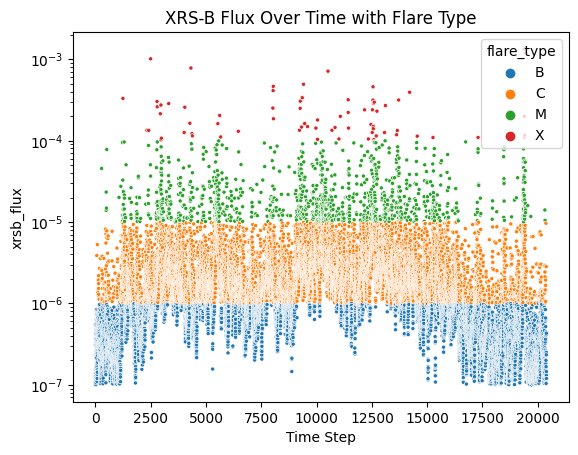

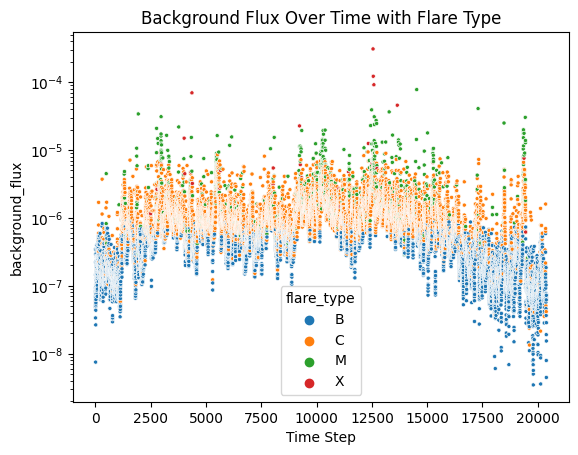

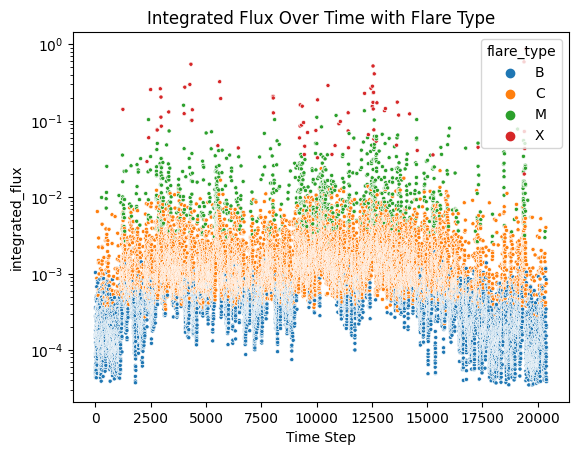

In [5]:
sns.scatterplot(data=subset, x=step, y='xrsb_flux', hue='flare_type', marker=".")
plt.yscale("log")
plt.title("XRS-B Flux Over Time with Flare Type")
plt.xlabel("Time Step")
plt.show()
sns.scatterplot(data=subset, x=step, y='background_flux', hue='flare_type', marker=".")
plt.yscale("log")
plt.xlabel("Time Step")
plt.title("Background Flux Over Time with Flare Type")
plt.show()
sns.scatterplot(data=subset, x=step, y='integrated_flux', hue='flare_type', marker=".")
plt.yscale("log")
plt.title("Integrated Flux Over Time with Flare Type")
plt.xlabel("Time Step")
plt.show()

## Define ML Model:

In [6]:
classifier = svm.SVC(kernel='rbf', class_weight={"B": 200, "C": 200, "M": 5, "X": 100})
classifier.fit(trainX,trainY.values.reshape(len(trainY),))

SVC(class_weight={'B': 200, 'C': 200, 'M': 5, 'X': 100})

In [7]:
y_pred = classifier.predict(testX)
test = test.assign(prediction=y_pred)
metrics = {"precision": 0, "recall": 0, "f-score": 0, "support": 0}
p, r, f, s = precision_recall_fscore_support(testY, y_pred, labels=classNames)
metrics['precision'] = p
metrics["recall"] = r
metrics['f-score'] = f
metrics['support'] = s
metrics


{'precision': array([0.9965353 , 0.99081515, 1.        , 0.88      ]),
 'recall': array([0.99783174, 0.99768786, 0.90881459, 1.        ]),
 'f-score': array([0.9971831 , 0.99423963, 0.9522293 , 0.93617021]),
 'support': array([2306, 3460,  329,   22], dtype=int64)}

Text(0.5, 1.0, 'Confusion Matrix')

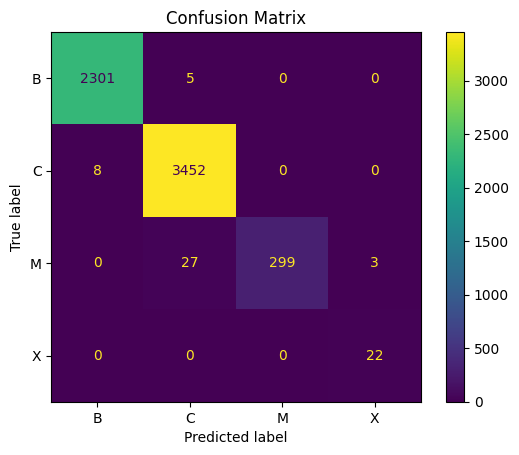

In [8]:
disp = ConfusionMatrixDisplay.from_estimator(classifier, testX, testY, display_labels=classNames)
disp.ax_.set_title("Confusion Matrix")

## Plot Predictions vs. Actual Results

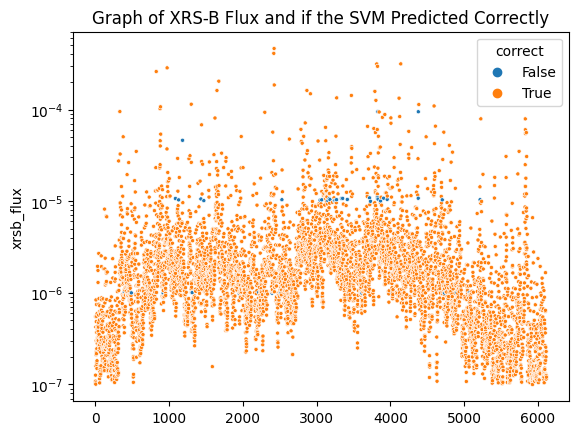

In [9]:
test['correct'] = test['flare_type'] == test['prediction']
sns.scatterplot(data=test, x=[i for i in range(len(test))], y="xrsb_flux", hue='correct', marker='.')
plt.yscale("log")
plt.title("Graph of XRS-B Flux and if the SVM Predicted Correctly")
plt.show()

In [10]:
# Number of false predictions
display(len(test[test.correct == False]))

43

In [11]:
def MonteCarloCrossValidation(n, split, data, features, classes, classNames):
    clf = svm.SVC(kernel='rbf', class_weight={"B": 200, "C": 200, "M": 5, "X": 100})
    metrics = {}
    for cls in classNames:
        metrics[cls] = {"p": 0, "r": 0, "f": 0, "s": 0}
    for _ in range(n):
        trainCount = int(split * len(data))
        trainIndices = np.random.choice(data.index,trainCount,replace=False)
        train = data[data.index.isin(trainIndices)]
        test = data[data.index.isin(trainIndices) == False]
        trainX = train[features]
        trainY = train[classes]
        testX = test[features]
        testY = test[classes]

        clf.fit(trainX,trainY.values.reshape(len(trainY),))
        predY = clf.predict(testX)
        p, r, f, s = precision_recall_fscore_support(testY, predY)
        for i in range(len(classNames)):
            metrics[classNames[i]]["p"] += p[i]
            metrics[classNames[i]]["r"] += r[i]
            metrics[classNames[i]]["f"] += f[i]
            metrics[classNames[i]]["s"] += s[i]
    for val in metrics.values():
        for key in val.keys():
            val[key] /= n
    return metrics

display("Average p,r,f,s for each class:")
MonteCarloCrossValidation(10,0.7,xrayData,features,classes,classNames)

'Average p,r,f,s for each class:'

{'B': {'p': 0.9937083829279612,
  'r': 0.9971042789987438,
  'f': 0.9954014192625504,
  's': 2345.1},
 'C': {'p': 0.9904923639334283,
  'r': 0.9956737446949029,
  'f': 0.9930747450377607,
  's': 3418.8},
 'M': {'p': 0.9970301291733256,
  'r': 0.9164190569262989,
  'f': 0.9549783520858499,
  's': 330.0},
 'X': {'p': 0.9328111528027195,
  'r': 0.9640034080251472,
  'f': 0.9469688834777763,
  's': 23.1}}

## Now, try predicting based on only one feature

We use Monte Carlo Cross Validation to see how our model does with only one feature

In [12]:
display("Based on Standardized Flux")
display(MonteCarloCrossValidation(4,0.7,xrayData,["flux_standardized"], classes, classNames))
display("Based on Standardized Background Flux")
display(MonteCarloCrossValidation(4,0.7,xrayData,["background_standardized"], classes, classNames))
display("Based on Standardized Integrated Flux")
MonteCarloCrossValidation(4,0.7,xrayData,["integrated_standardized"], classes, classNames)

'Based on Standardized Flux'

{'B': {'p': 0.9981868113818155,
  'r': 1.0,
  'f': 0.9990923003870279,
  's': 2343.0},
 'C': {'p': 0.9927784567777563,
  'r': 0.9987554238984744,
  'f': 0.9957578636932085,
  's': 3406.25},
 'M': {'p': 1.0,
  'r': 0.9265852635659757,
  'f': 0.9618911408858295,
  's': 344.25},
 'X': {'p': 0.9752415458937198, 'r': 1.0, 'f': 0.9873015873015873, 's': 23.5}}

'Based on Standardized Background Flux'

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'B': {'p': 0.8304460538200202,
  'r': 0.9241148810405817,
  'f': 0.874750821198491,
  's': 2361.0},
 'C': {'p': 0.8561075413418376,
  'r': 0.8730712413271671,
  'f': 0.8644871904851665,
  's': 3394.75},
 'M': {'p': 0.8807692307692307,
  'r': 0.053048492851212256,
  'f': 0.0997385387488957,
  's': 336.5},
 'X': {'p': 0.017857142857142856,
  'r': 0.009259259259259259,
  'f': 0.012195121951219513,
  's': 24.75}}

'Based on Standardized Integrated Flux'

{'B': {'p': 0.9048753782204759,
  'r': 0.9099880065026111,
  'f': 0.9074002886762693,
  's': 2328.75},
 'C': {'p': 0.8706635710422141,
  'r': 0.9351837243186487,
  'f': 0.9017682850284271,
  's': 3448.0},
 'M': {'p': 0.8994252873563218,
  'r': 0.08436328387176756,
  'f': 0.1515193793609328,
  's': 319.0},
 'X': {'p': 0.4497692900065647,
  'r': 0.8972416744475568,
  'f': 0.5957743637292399,
  's': 21.25}}

**Result:**  Model seems to perform *better* with only the standardized XRS-B flux. Let's compare that model with the full model, and with a model excluding the background flux, which seems to perform the worst.

In [13]:
display(MonteCarloCrossValidation(10,0.7,xrayData,['flux_standardized'],classes, classNames))
display(MonteCarloCrossValidation(10,0.7,xrayData,['flux_standardized','integrated_standardized'],classes, classNames))
MonteCarloCrossValidation(10,0.7,xrayData,features,classes, classNames)

{'B': {'p': 0.9988480205001086,
  'r': 0.9997454880583607,
  'f': 0.9992960938419568,
  's': 2346.6},
 'C': {'p': 0.9924189803607307,
  'r': 0.9992073017852995,
  'f': 0.9958007238309587,
  's': 3407.2},
 'M': {'p': 1.0, 'r': 0.923655472832613, 'f': 0.9602500548336828, 's': 341.2},
 'X': {'p': 0.9766033138401561, 'r': 1.0, 'f': 0.9878658898530436, 's': 22.0}}

{'B': {'p': 0.9977776525545081,
  'r': 0.9983356949775821,
  'f': 0.9980560629254056,
  's': 2339.4},
 'C': {'p': 0.9922017766882505,
  'r': 0.998480581926211,
  'f': 0.995330771505652,
  's': 3417.2},
 'M': {'p': 0.9990546197646966,
  'r': 0.9292691047817024,
  'f': 0.9628734337829874,
  's': 337.4},
 'X': {'p': 0.9561154757856013,
  'r': 0.9882619047619048,
  'f': 0.9714408039466667,
  's': 23.0}}

{'B': {'p': 0.9947880015557449,
  'r': 0.9980185620080627,
  'f': 0.9964000522741661,
  's': 2330.0},
 'C': {'p': 0.9911324574477682,
  'r': 0.9964406492587339,
  'f': 0.99377886557071,
  's': 3431.8},
 'M': {'p': 0.9970492195676078,
  'r': 0.9165655917576722,
  'f': 0.9550533899631439,
  's': 331.9},
 'X': {'p': 0.9312933939013399,
  'r': 0.9588949311558007,
  'f': 0.9439998707497365,
  's': 23.3}}

The model performs best when only the standardized XRS-B flux is used, so we will simplify our model:

{'precision': array([1.        , 0.99453866, 1.        , 1.        ]),
 'recall': array([1.        , 1.        , 0.94224924, 1.        ]),
 'f-score': array([1.        , 0.99726185, 0.97026604, 1.        ]),
 'support': array([2306, 3460,  329,   22], dtype=int64)}

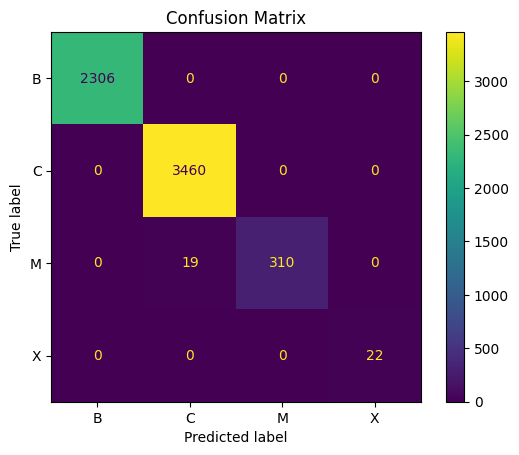

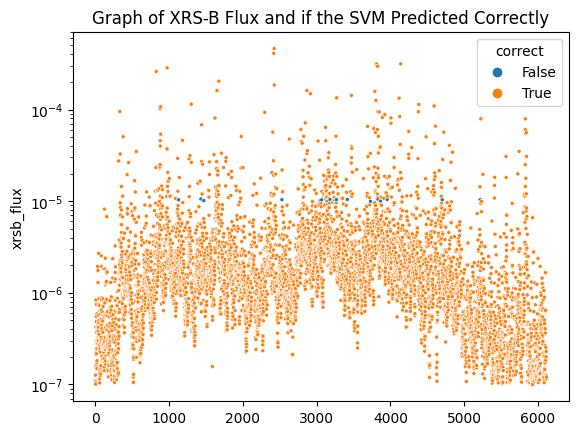

array([<Axes: >, <Axes: >], dtype=object)

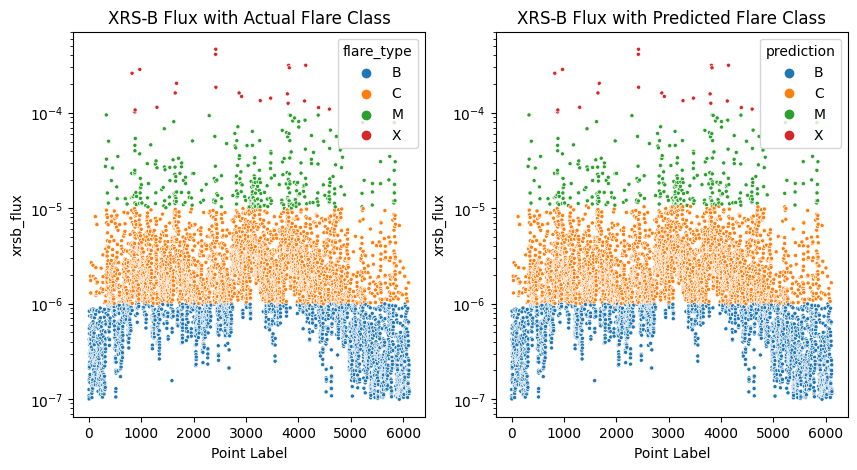

{'B': {'p': 0.9976968925638706,
  'r': 0.9998320196522773,
  'f': 0.9987620192237927,
  's': 2330.5},
 'C': {'p': 0.9922628751617092,
  'r': 0.9984462541370096,
  'f': 0.9953438449181666,
  's': 3425.0},
 'M': {'p': 0.99967706877814,
  'r': 0.9211624510346621,
  'f': 0.9587804531380174,
  's': 338.95},
 'X': {'p': 0.9777881192881193,
  'r': 0.9962142857142858,
  'f': 0.9866052374720594,
  's': 22.55}}

19

In [14]:
# -- DEFINE INPUT AND OUTPUT --
features = ['flux_standardized']
# features = ['xrsb_flux', 'background_flux', 'integrated_flux']
X = xrayData[features]
trainX = train[features]
testX = test[features]

# classNames = ["A","B", "C", "M", "X"]
classNames = ["B", "C", "M", "X"]
classes = ['flare_type']
y = xrayData[classes]
trainY = train[classes]
testY = test[classes]

# -- DEFINE MODEL --
classifier = svm.SVC(kernel='rbf', class_weight={"B": 200, "C": 200, "M": 5, "X": 100})
classifier.fit(trainX,trainY.values.reshape(len(trainY),))

# -- PREDICT --
y_pred = classifier.predict(testX)
test = test.assign(prediction=y_pred)
metrics = {"precision": 0, "recall": 0, "f-score": 0, "support": 0}
p, r, f, s = precision_recall_fscore_support(testY, y_pred, labels=classNames)
metrics['precision'] = p
metrics["recall"] = r
metrics['f-score'] = f
metrics['support'] = s
display(metrics)

# -- MAKE PLOTS --
disp = ConfusionMatrixDisplay.from_estimator(classifier, testX, testY, display_labels=classNames)
disp.ax_.set_title("Confusion Matrix")
plt.show()

test['correct'] = test['flare_type'] == test['prediction']
sns.scatterplot(data=test, x=[i for i in range(len(test))], y="xrsb_flux", hue='correct', marker='.')
plt.yscale("log")
plt.title("Graph of XRS-B Flux and if the SVM Predicted Correctly")
plt.show()

fig, ax = plt.subplots(1,2, figsize=(10,5))
display(ax)
sns.scatterplot(data=test, x=[i for i in range(len(test))], y="xrsb_flux", hue='flare_type', marker='.', ax=ax[0])
ax[0].set_title("XRS-B Flux with Actual Flare Class")
ax[0].set_yscale('log')
ax[0].set_xlabel("Point Label")
sns.scatterplot(data=test, x=[i for i in range(len(test))], y="xrsb_flux", hue='prediction', marker='.', ax=ax[1])
ax[1].set_title("XRS-B Flux with Predicted Flare Class")
ax[1].set_yscale('log')
ax[1].set_xlabel("Point Label")
plt.show()

# Cross validation
display(MonteCarloCrossValidation(20,0.7,xrayData,['flux_standardized'],classes, classNames))

# Number of false predictions
display(len(test[test.correct == False]))

The classifier performs very well, as shown by the printed metrics and the confusion matrix above

array([<Axes: >, <Axes: >], dtype=object)

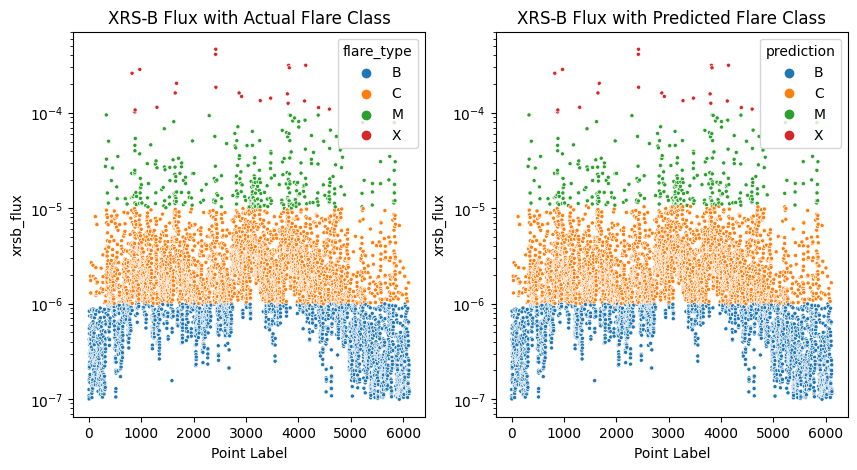

20390

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
display(ax)
sns.scatterplot(data=test, x=[i for i in range(len(test))], y="xrsb_flux", hue='flare_type', marker='.', ax=ax[0])
ax[0].set_title("XRS-B Flux with Actual Flare Class")
ax[0].set_yscale('log')
ax[0].set_xlabel("Point Label")
sns.scatterplot(data=test, x=[i for i in range(len(test))], y="xrsb_flux", hue='prediction', marker='.', ax=ax[1])
ax[1].set_title("XRS-B Flux with Predicted Flare Class")
ax[1].set_yscale('log')
ax[1].set_xlabel("Point Label")
plt.show()

len(train) + len(test)

# Raisins Classifier

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import math
from sklearn.preprocessing import StandardScaler


In [17]:
df = pd.read_csv('data/Raisin_Dataset.csv')

# Select predictors (X) and target variable (y)
X = df.drop('Class', axis=1)

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit scaler on predictors (X) only
scaler.fit(X)

# Transform predictors (X) only
X_scaled = scaler.transform(X)


generalized_data = pd.DataFrame(X_scaled, columns=X.columns)
df = df.dropna()
generalized_data = generalized_data.dropna()

In [18]:
X_scaled

array([[-0.00718637,  0.09757695, -0.02395819, ..., -0.01570903,
         1.10674264,  0.06627397],
       [-0.32421719, -0.20901207, -0.22929222, ..., -0.3042482 ,
        -0.28777679, -0.16125245],
       [ 0.07829241,  0.09775835,  0.23698797, ...,  0.06211335,
        -1.15824974,  0.15594468],
       ...,
       [ 0.30407232,  0.00670023,  0.88767401, ...,  0.37004063,
         0.77828911,  0.46387322],
       [ 0.14671134,  0.39160036, -0.00624644, ...,  0.15871029,
        -0.76180437,  0.3385864 ],
       [-0.05631357,  0.69976181, -0.78493347, ..., -0.04881606,
        -1.26290931,  0.39090133]])

In [19]:
df['Class'] = df['Class'].replace({'Kecimen': 0, 'Besni': 1})

lm = LogisticRegression()
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [20]:
lm = LogisticRegression()

X = generalized_data[['MajorAxisLength', 'Perimeter','Area' 	, 	'MinorAxisLength' 	,'Eccentricity' 	,'ConvexArea' 	,'Extent' 	]]

lm.fit(X, df['Class'])
y = df.Class
y_pred = lm.predict(X)


display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[1,0])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'predicted range: [0.00,1.00]'

'precision = [0.88194444 0.8525641 ]'

'recall = [0.84666667 0.88666667]'

'f-score = [0.86394558 0.86928105]'

Which variables are predictive of the target variable? -- Realistically, all of these are predictive of the target variable considering they all relate (in some way) to the classification of a raisin.

Text(0, 0.5, 'Major Axis Length')

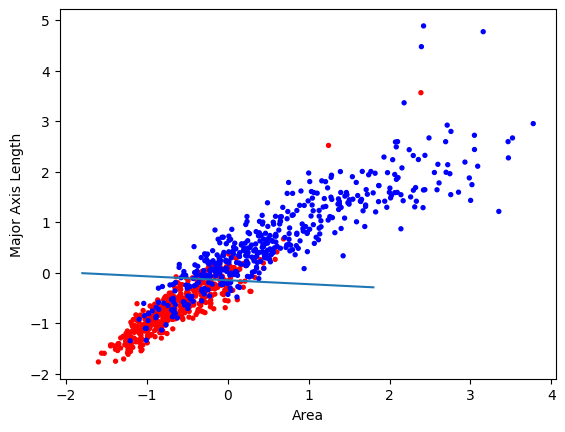

In [21]:

lm = LogisticRegression()

X = generalized_data[['Area','MajorAxisLength']]

lm.fit(X, df['Class'])
y = df.Class
y_pred = lm.predict(X)
color = ['r' if y_ == 0 else 'b' for y_ in df.Class]
plt.scatter(generalized_data.Area, generalized_data['MajorAxisLength'], c=color, s=8)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-1.8, 1.8]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('Area')
plt.ylabel('Major Axis Length')

Text(0, 0.5, 'ConvexArea')

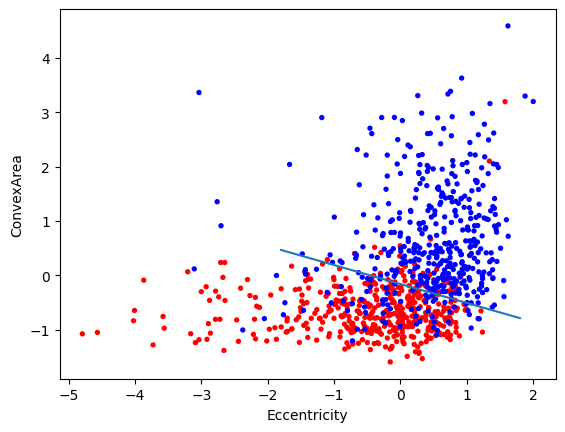

In [22]:
lm = LogisticRegression()

X = generalized_data[['Eccentricity','ConvexArea']]

lm.fit(X, df['Class'])
y = df.Class
y_pred = lm.predict(X)
color = ['r' if y_ == 0 else 'b' for y_ in df.Class]
plt.scatter(generalized_data.Eccentricity, generalized_data['ConvexArea'], c=color, s=8)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-1.8, 1.8]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('Eccentricity')
plt.ylabel('ConvexArea')

Text(0, 0.5, 'Major Axis Length')

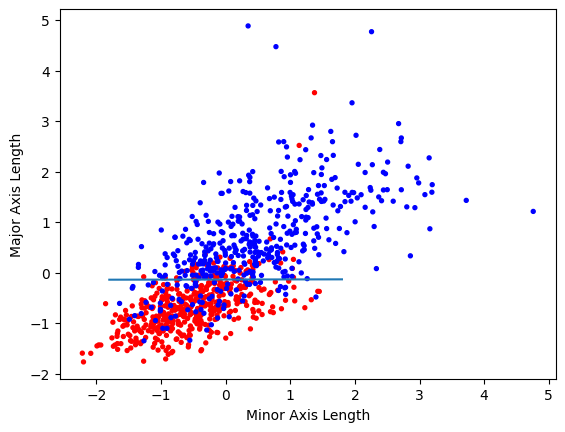

In [23]:

lm = LogisticRegression()

X = generalized_data[['MinorAxisLength','MajorAxisLength']]

lm.fit(X, df['Class'])
y = df.Class
y_pred = lm.predict(X)
color = ['r' if y_ == 0 else 'b' for y_ in df.Class]
plt.scatter(generalized_data.MinorAxisLength, generalized_data['MajorAxisLength'], c=color, s=8)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-1.8, 1.8]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('Minor Axis Length')
plt.ylabel('Major Axis Length')

Text(0, 0.5, 'Major Axis Length')

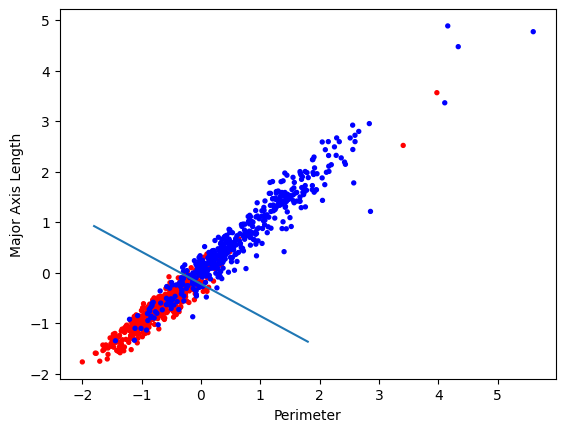

In [24]:

lm = LogisticRegression()

X = generalized_data[['Perimeter','MajorAxisLength']]

lm.fit(X, df['Class'])
y = df.Class
y_pred = lm.predict(X)
color = ['r' if y_ == 0 else 'b' for y_ in df.Class]
plt.scatter(generalized_data.Perimeter, generalized_data['MajorAxisLength'], c=color, s=8)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-1.8, 1.8]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('Perimeter')
plt.ylabel('Major Axis Length')

c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'f-score = [0.81911263 0.82736156]'

Text(0, 0.5, 'Convex Area')

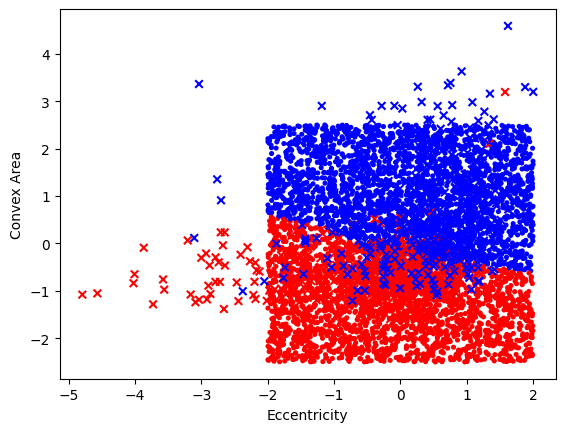

In [25]:
X = generalized_data[['Eccentricity','ConvexArea']]

y = df.Class

clf = svm.SVC(kernel='poly', degree=3)
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
# for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7)

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(generalized_data.Eccentricity, generalized_data.ConvexArea, c=color, s=30, marker='x')
plt.xlabel('Eccentricity')
plt.ylabel('Convex Area')

In [26]:
X = generalized_data[['MajorAxisLength']]

y = df.Class

clf = svm.SVC(kernel='linear', class_weight={0:1, 1:1})
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))



c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'f-score = [0.86457205 0.85746864]'

In [27]:
X = generalized_data[['Eccentricity','ConvexArea']]

y = df.Class

clf = svm.SVC(kernel='linear', class_weight={0:1, 1:1})
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))



c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'f-score = [0.86637931 0.85779817]'

In [28]:
X = generalized_data[['Eccentricity','ConvexArea']]

y = df.Class

clf = svm.SVC(kernel='linear', class_weight={0:1, 1:5})
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))



c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'f-score = [0.69325997 0.79217148]'

In [29]:
X = generalized_data[['Eccentricity','ConvexArea']]

y = df.Class

clf = svm.SVC(kernel='linear', class_weight={0:.9, 1:1})
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))


c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'f-score = [0.85745614 0.8536036 ]'

In [30]:
X = generalized_data[['Eccentricity','ConvexArea']]

y = df.Class

clf = svm.SVC(kernel='rbf')
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))

c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'f-score = [0.87076271 0.85747664]'

In [31]:
X = generalized_data[['MajorAxisLength', 'Perimeter','Area' 	, 	'MinorAxisLength' 	,'Eccentricity' 	,'ConvexArea' 	,'Extent' 	]]
y = df.Class

clf = svm.SVC(kernel='rbf')
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))

c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'f-score = [0.87804878 0.86581097]'

In [32]:
X = generalized_data[['MajorAxisLength', 'Perimeter','Area' 	, 	'MinorAxisLength' 	,'Eccentricity' 	,'ConvexArea' 	,'Extent' 	]]
y = df.Class

clf = svm.SVC(kernel='poly', degree = 3)
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))

c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'f-score = [0.8496732  0.84353741]'